In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
learning_curves = np.load('Results/DefaultExp/learning_curve.npz')
ROC_curves = np.load('Results/DefaultExp/ROC_curve.npz')

In [3]:
print(learning_curves['losses_train'], learning_curves['losses_val'])

[0.47995749 0.39510534 0.36011051 0.33627287 0.31412412 0.29640711
 0.28348362 0.27101428 0.26107262 0.25306814 0.24679065 0.24107999
 0.23466417 0.22685688 0.21290199 0.20842448 0.2011001  0.19228453
 0.16216269 0.15139638 0.14662528 0.1438686  0.13937139 0.13601078
 0.13459053] [0.3958263  0.3617972  0.3401334  0.32858085 0.31300089 0.28074045
 0.29066896 0.28722187 0.28329246 0.27062628 0.25345547 0.2482558
 0.28490194 0.24212994 0.25432978 0.25499631 0.27020706 0.26244223
 0.23541363 0.23984719 0.24196529 0.24417144 0.2487725  0.25088782
 0.25108557]


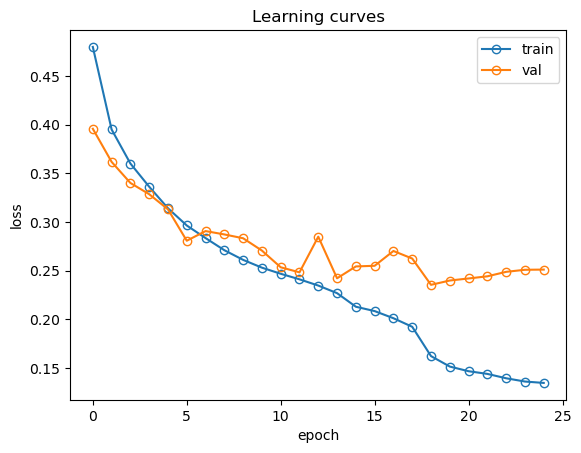

In [4]:
fig = plt.figure()

plt.plot(learning_curves['losses_train'], label='train', marker='o', fillstyle='none')
plt.plot(learning_curves['losses_val'], label='val', marker = "o", fillstyle = "none")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Learning curves')
plt.legend()
plt.show()

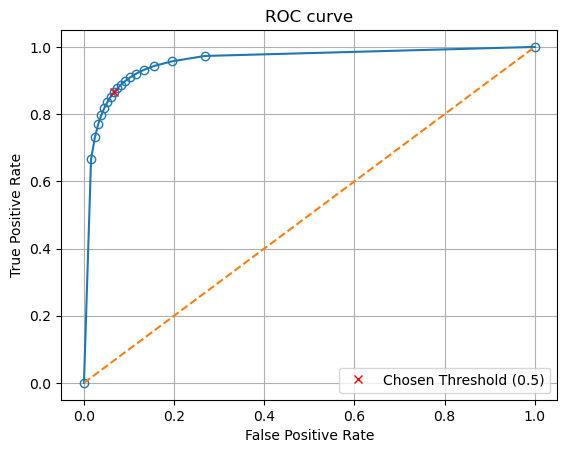

In [5]:
fig = plt.figure()

plt.plot(ROC_curves['FPR'], ROC_curves['TPR'], marker='o', fillstyle='none')
plt.plot([0,1],[0,1], '--', fillstyle = "none")
plt.plot(ROC_curves['FPR'][10], ROC_curves['TPR'][10], color='red', marker='x', linestyle='', fillstyle='none', label='Chosen Threshold (0.5)')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.grid()
plt.show()